In [1]:
from divisivegater.spectralcover import Cover

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import LocallyLinearEmbedding
from sklearn import datasets
from umap import UMAP

In [3]:
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target

In [4]:
cover = Cover(n_patches=15, n_neighbors=10)

In [5]:
%%time
cover.compute_cover(X)

CPU times: user 2.62 s, sys: 1.22 s, total: 3.84 s
Wall time: 1.45 s


In [6]:
%%time
umap = UMAP()
Y = umap.fit_transform(X)

/home/mbr085/anaconda3/envs/divisivegater/lib/python3.7/site-packages/umap/umap_.py:349: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "fuzzy_simplicial_set" failed type inference due to: Untyped global name 'nearest_neighbors': cannot determine Numba type of <class 'function'>

File "../../../anaconda3/envs/divisivegater/lib/python3.7/site-packages/umap/umap_.py", line 467:
def fuzzy_simplicial_set(
    <source elided>
    if knn_indices is None or knn_dists is None:
        knn_indices, knn_dists, _ = nearest_neighbors(
        ^

  @numba.jit()
/home/mbr085/anaconda3/envs/divisivegater/lib/python3.7/site-packages/numba/compiler.py:725: NumbaWarning: Function "fuzzy_simplicial_set" was compiled in object mode without forceobj=True.

File "../../../anaconda3/envs/divisivegater/lib/python3.7/site-packages/umap/umap_.py", line 350:
@numba.jit()
def fuzzy_simplicial_set(
^

  self.func_ir.loc))
/home/mbr085/anaconda3/envs/divisivegate

CPU times: user 6.02 s, sys: 336 ms, total: 6.36 s
Wall time: 5.82 s


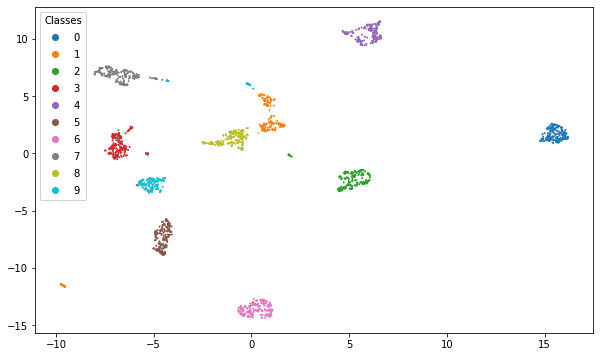

In [7]:
fig, ax = plt.subplots(figsize=(10,6))

scatter = ax.scatter(Y[:,0], Y[:,1], s=1, c=y, cmap="tab10")

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)


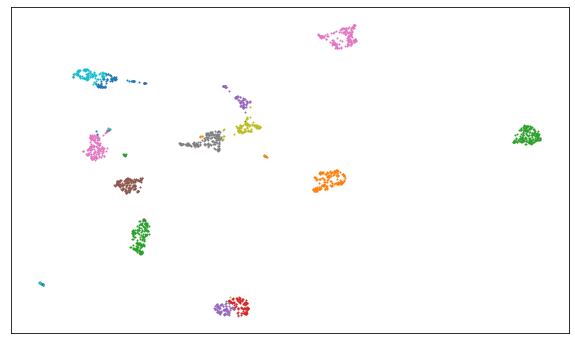

In [8]:
fig, ax = plt.subplots(figsize=(10,6))

ax = cover.plot_cover(Y=Y, s=1, alpha=1, ax=ax, num_colors=12)


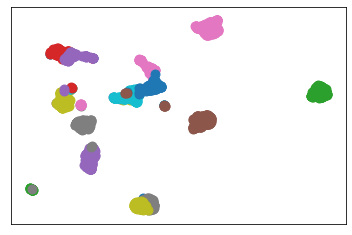

In [9]:
cover.plot_cover(Y=Y, s=80, alpha=1)

In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
y_cover = np.empty(len(X), dtype=int)

In [12]:
for idx, patch in enumerate(cover.cover):
    y_cover[patch.point_indices] = idx

In [13]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
confusion_matrix(y_cover, y)[:, :10]

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 177,   0,   0,   0,   0,   0],
       [  0,   1,   0,   1,   0, 178,   0,   0,   0,   2],
       [  0,  56,   0,   0,   0,   0,   0,   0,   3,  24],
       [  0,   0,   0,   1,   0,   4,   0,   0,   2, 144],
       [  0,   0,   0, 160,   0,   0,   0,   0,   2,   1],
       [  0,   0,   3,   6,   1,   0,   0,   0, 155,   3],
       [  0,  98,   1,   0,   0,   0,   1,   0,   9,   1],
       [  0,  26,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   2,   3,   0,   0, 106,   0,   1],
       [  0,   0,   1,   2,   0,   0,   0,  73,   0,   4],
       [  0,   0, 172,   0,   0,   0,   0,   0,   3,   0],
       [  0,   0,   0,  11,   0,   0,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,  98,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  82,   0,   0,   0]])

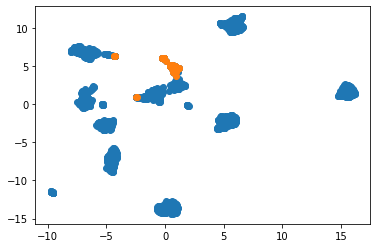

In [20]:
patch_idx = 3
plt.scatter(Y[:,0], Y[:,1])
plt.scatter(Y[cover.cover[patch_idx].point_indices, 0],
            Y[cover.cover[patch_idx].point_indices, 1])

Text(0.5, 1.0, 'A selection from the 64-dimensional digits dataset')

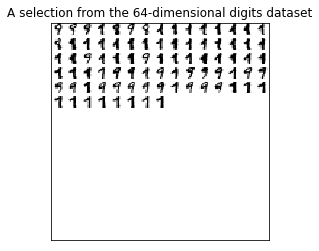

In [21]:
# Plot images of the digits
sample = cover.cover[patch_idx].point_indices
n_img_per_row = 15
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):        
        if i * n_img_per_row + j >= len(sample):
            continue
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[sample[i * n_img_per_row + j]].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')



In [17]:
[patch.leaf_cost for patch in cover.cover]

[5902.083934486623,
 6642.940683280268,
 6555.571049079918,
 3257.959481030814,
 5261.992314961976,
 5908.3741391505355,
 6154.889774574167,
 4658.28497715668,
 1021.7860893473631,
 4125.658809075902,
 2914.853530636926,
 6573.374017737169,
 337.4817619896901,
 3823.6100266301823,
 2865.2373673481425]

In [18]:
[patch.second_moment for patch in cover.cover]

[5902.083934486623,
 6642.940683280268,
 6555.571049079918,
 3257.959481030814,
 5261.992314961976,
 5908.3741391505355,
 6154.889774574167,
 4658.28497715668,
 1021.7860893473631,
 4125.658809075902,
 2914.853530636926,
 6573.374017737169,
 337.4817619896901,
 3823.6100266301823,
 2865.2373673481425]

In [19]:
[[child.second_moment for child in patch.children] for patch in cover.cover]

[[3982.1138281879867, 1902.9931953775865],
 [5467.79081038489, 1175.1498701066018],
 [3575.2391804312324, 2979.9996968005566],
 [2420.262531941932, 836.0870285765476],
 [3462.048569543866, 1795.303676637794],
 [3982.687309185025, 1924.6948245922308],
 [4427.263081160979, 1725.718265699185],
 [3358.5733535925688, 1269.3082420720232],
 [627.1123353937113, 394.65049717817794],
 [2418.064030522912, 1707.594551488029],
 [2417.9887540570153, 493.8897070679924],
 [4179.798218953849, 2393.1152750501315],
 [177.6166353130879, 159.03273313625368],
 [2024.7234107285017, 1798.588528095533],
 [1573.9529158828273, 1291.261750328668]]